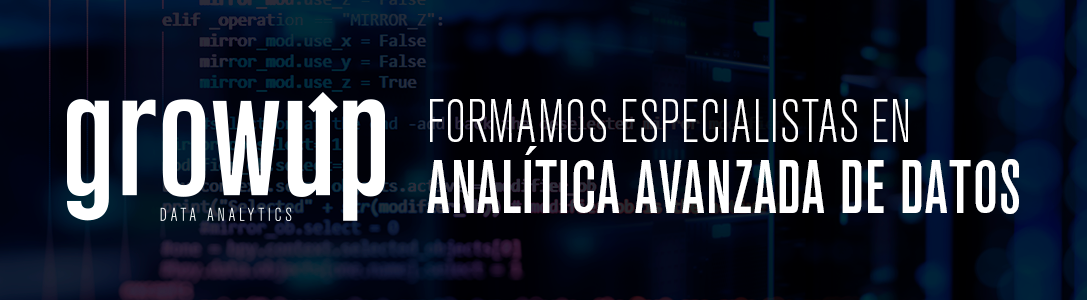

# **Forecast de Ventas por País y Categoría de Tarjeta: Predicción Basada en Series Temporales**

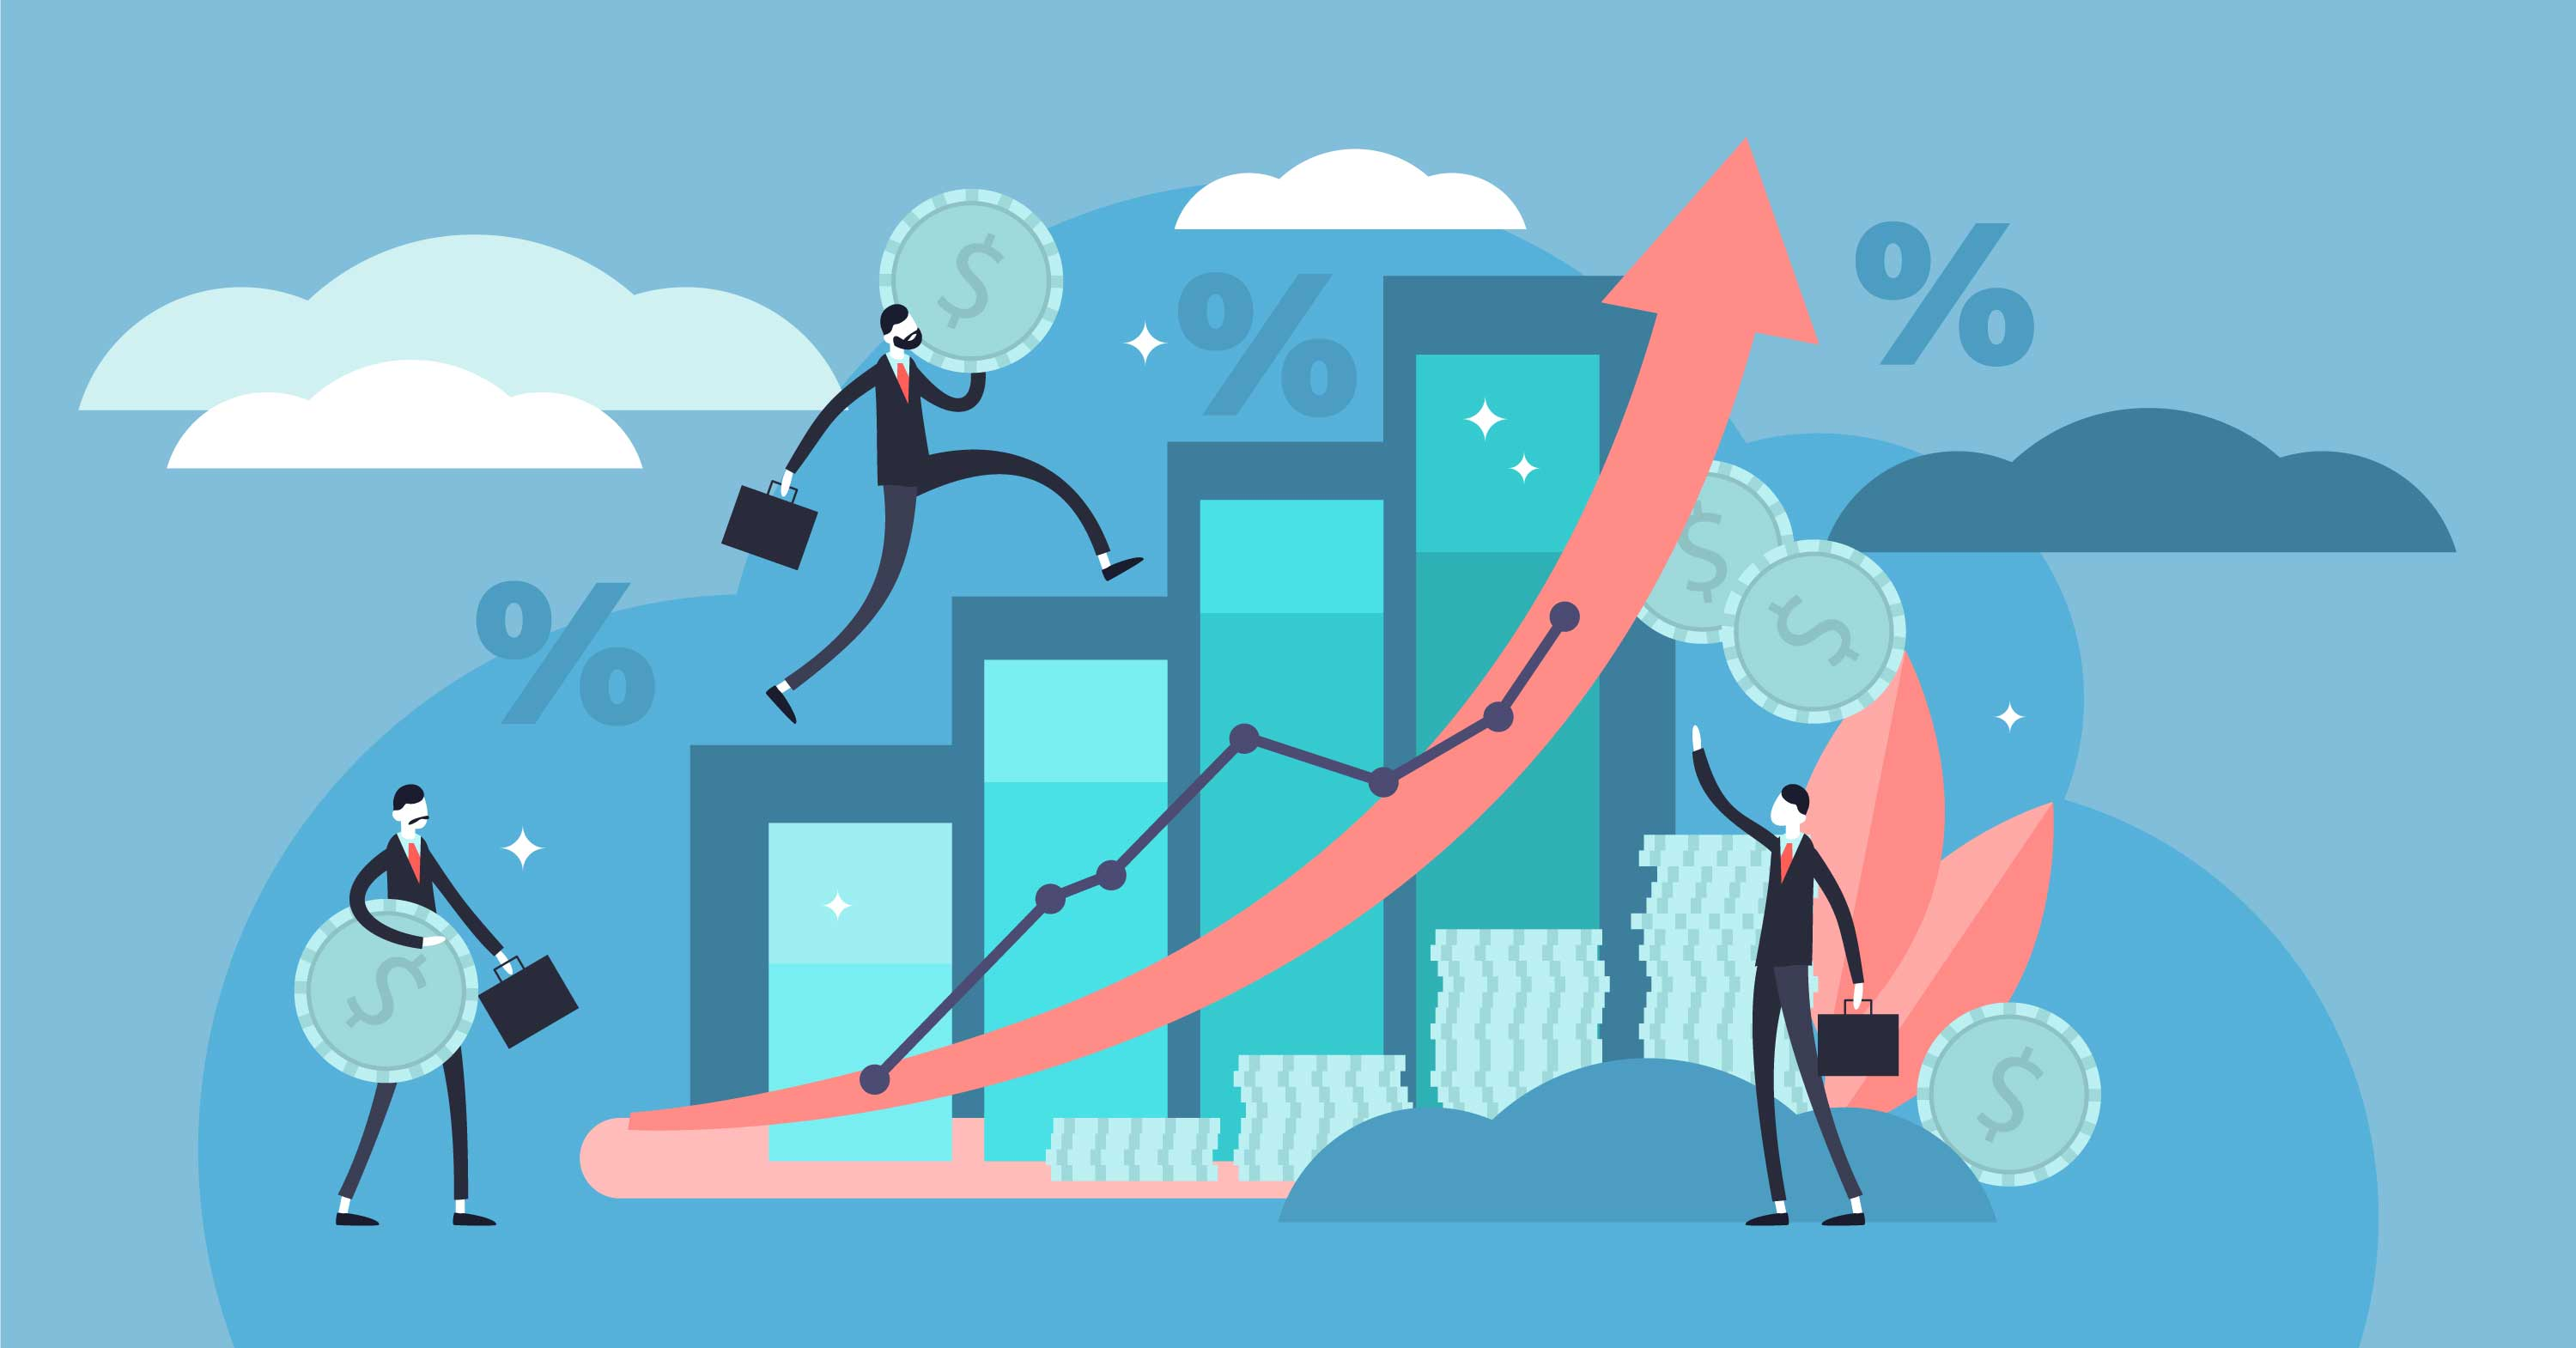

## **Definición del problema**

El forecasting (pronóstico) es una técnica de análisis predictivo que busca predecir valores futuros basándose en datos históricos. Se utiliza en una variedad de campos como finanzas, ventas, meteorología, entre otros. En este proyecto, el objetivo principal es realizar un análisis de series temporales para predecir las ventas futuras. Utilizando los datos históricos proporcionados, aplicaremos diferentes métodos de forecasting, como descomposición de series temporales, modelos de regresión y algoritmos avanzados como LightGBM. Este análisis permitirá a la empresa anticipar tendencias y ajustar sus estrategias comerciales.

**Objetivo del Proyecto:**

El objetivo del forecast es predecir el comportamiento de las ventas en el futuro, utilizando como base la información de fecha del pedido, categoría de tarjeta, país, y ventas. Esto permitirá obtener información sobre posibles incrementos o descensos en las ventas en distintos periodos, lo que permitirá a la empresa tomar decisiones estratégicas basadas en datos.

**Descripción del Dataset:**

El dataset que vamos a utilizar contiene información detallada de las ventas por fecha, categorizadas por tarjeta y país. A continuación, se presenta una descripción de las principales columnas:

* **Fecha Pedido:** Indica el día en que se realizó el pedido. Esta será la variable temporal clave para el análisis de forecasting.
* **Categoría Tarjeta:** Tipo de tarjeta utilizada para la compra, con valores como 'Azul', 'Oro', 'Plata', entre otros.
* **País:** País en el que se realizó la venta. Esto permitirá analizar las ventas por región geográfica.
* **Ventas:** Monto total de ventas realizadas en un día específico.
Cada fila del dataset representa una combinación única de fecha, categoría de tarjeta, y país, junto con el total de ventas para esa combinación en ese día.

### **Proceso General del Forecast:**
* **Exploración de Datos:**
1. Se realizará un análisis exploratorio (EDA) de las ventas para identificar patrones de tendencias y estacionalidades en las series temporales.
2. Se detectarán y manejarán posibles valores atípicos o datos faltantes en la columna de ventas.
3. Las ventas se graficarán a lo largo del tiempo para observar posibles patrones de tendencia o ciclos estacionales que podrían influir en la predicción.

* **Transformación de Datos:**

Los datos de ventas se convertirán en features útiles para el modelo, tales como:
1. Lags (ventanas de tiempo).
2. Promedios móviles.
3. Agregaciones por mes o semana.
4. Características derivadas como mes, día de la semana, y festivos.
* Se garantizará que las características generadas reflejen los patrones observados en los datos históricos.


* **Selección del Modelo:**

1. Se utilizará LightGBM como el modelo principal para realizar el forecast. Este algoritmo basado en boosting es ideal para manejar series temporales con múltiples características predictivas.
2. LightGBM permitirá manejar grandes volúmenes de datos y generar predicciones precisas aprovechando las características temporales.
3. Se aplicarán técnicas de hiperparámetro tuning y validación cruzada para optimizar el rendimiento del modelo..

* **Evaluación del Modelo:**

1. Se utilizarán métricas como RMSE (Root Mean Squared Error) y MAE (Mean Absolute Error) para evaluar el rendimiento del modelo.
2. Las predicciones se compararán con los valores reales para validar el modelo y ajustarlo según sea necesario.
3. El objetivo será minimizar los errores de predicción y obtener estimaciones precisas de ventas.

* **Visualización de Resultados:**

1. Se generarán gráficos interactivos para visualizar las predicciones de ventas futuras utilizando las predicciones.
2. Se visualizarán las tendencias, estacionalidades y los valores predichos vs observados en gráficos claros para facilitar la interpretación de los resultados y apoyar la toma de decisiones basada en los datos.


# 📥 **Importar Librerías**

In [ ]:
## Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Visualizacion Interactiva
import bokeh
from bokeh.models import CustomJS, ColumnDataSource, Slider, Label, Div, HoverTool, Band, Span, Select, BoxAnnotation
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.palettes import Spectral11
from bokeh.layouts import column, row
from bokeh.io import curdoc
import ipywidgets as widgets
bokeh.io.output_notebook()


#Modelos
import lightgbm as lgb
#!pip install shap
#import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer


## Configuracion de errores
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# ✅ **Cargar el Conjunto de Datos**

In [ ]:
url_train = "https://raw.githubusercontent.com/emadrigals104/PLFPython/main/Datasets/df_train.csv"

df = pd.read_csv(url_train,
                 sep=',',header=0,parse_dates=['Fecha Pedido'])

# **Exploración de datos**
La exploración de datos es el primer paso en cualquier proyecto de ciencia de datos. Consiste en revisar y entender el conjunto de datos, observando su tamaño, la naturaleza de las variables, y buscando posibles valores faltantes o inconsistencias. Esta etapa ayuda a obtener una visión general antes de comenzar con análisis más complejos. Algunos de los aspectos clave incluyen:

* **Distribución de las variables:** Examinar si las variables siguen una distribución normal o no.
* **Tipos de datos:** Identificar si los datos son categóricos, numéricos o de otro tipo.
* **Valores faltantes:** Revisar si hay valores nulos que deban tratarse.

In [ ]:
df.head()

,Fecha Pedido,Categoría Tarjeta,País,Ventas,ID Cliente,Nombre Cliente
0,2019-01-01,Azul,Ecuador,13,GM-14440,Gary McGarr
1,2019-01-02,Azul,Ecuador,11,RD-19720,Roger Demir
2,2019-01-03,Azul,Ecuador,14,DK-12835,Damala Kotsonis
3,2019-01-04,Azul,Ecuador,13,JF-15295,Jason Fortune-
4,2019-01-05,Azul,Ecuador,10,ML-17755,Max Ludwig


In [ ]:
df.tail()

,Fecha Pedido,Categoría Tarjeta,País,Ventas,ID Cliente,Nombre Cliente
72995,2023-12-27,Platino,Perú,57,DS-13030,Darrin Sayre
72996,2023-12-28,Platino,Perú,53,DP-13105,Dave Poirier
72997,2023-12-29,Platino,Perú,65,ZD-21925,Zuschuss Donatelli
72998,2023-12-30,Platino,Perú,74,AA-10480,Andrew Allen
72999,2023-12-31,Platino,Perú,69,MV-18190,Mike Vittorini


In [ ]:
df.shape

(73000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73000 entries, 0 to 72999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha Pedido       73000 non-null  datetime64[ns]
 1   Categoría Tarjeta  73000 non-null  object        
 2   País               73000 non-null  object        
 3   Ventas             73000 non-null  int64         
 4   ID Cliente         73000 non-null  object        
 5   Nombre Cliente     73000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,Fecha Pedido,Ventas
count,73000,73000.000000
mean,2021-07-01 18:25:26.794520576,52.141836
min,2019-01-01 00:00:00,3.000000
25%,2020-04-02 00:00:00,28.000000
50%,2021-07-02 00:00:00,49.000000
75%,2022-10-01 00:00:00,71.000000
max,2023-12-31 00:00:00,181.000000
std,NaN,28.305767


In [ ]:
df.isnull().sum()

,0
Fecha Pedido,0
Categoría Tarjeta,0
País,0
Ventas,0
ID Cliente,0
Nombre Cliente,0


# **5 Preguntas que todo Cientifico de Datos debe responder en un Forecast**

## **1. ¿Cómo están distribuidos los datos y qué patrones iniciales podemos observar?**
 **Propósito:** Obtener una comprensión general de los datos, detectar patrones y posibles problemas desde el principio.

* **Preguntas relacionadas:**

1. ¿Qué tendencias se observan en las ventas por categoría de tarjeta y país?
2. ¿Existen valores atípicos que deban ser tratados antes del modelado?
3. ¿Qué patrones temporales podemos identificar a través de la descomposición de la serie temporal?
* **Acciones en el EDA:**
1. Revisar la metadata de los datos y generar gráficos de barras para analizar la distribución de las ventas.
2. Descomponer la serie temporal para identificar tendencia, estacionalidad y ruido.
3. Detectar y tratar valores atípicos en los datos de ventas para evitar sesgos en el modelo.

# **Análisis Exploratorio de Datos**
El Análisis Exploratorio de Datos (EDA) es una fase crítica para identificar patrones, relaciones entre variables y posibles outliers. A través de gráficos (histogramas, scatter plots, box plots) y estadísticas descriptivas, se busca profundizar en el entendimiento de los datos. Los objetivos del EDA son:

* **Identificar relaciones:** Evaluar cómo se relacionan las diferentes variables entre sí.
* **Detectar patrones:** Observar tendencias que podrían ser útiles para el modelado.
* **Outliers o valores atípicos:** Detectar datos que no siguen el comportamiento general del conjunto, que podrían afectar los resultados.

In [ ]:
valores_unicos = df.nunique()
pd.DataFrame(valores_unicos, columns=["Valores Únicos"]).transpose()

,Fecha Pedido,Categoría Tarjeta,País,Ventas,ID Cliente,Nombre Cliente
Valores Únicos,1825,4,10,175,637,637


Podemos observar que la columna ID fila puede no ser útil ya que todos los valores son identificadores únicos, por lo que podemos descartarla.

In [ ]:
df = df.drop(columns=['ID Cliente', 'Nombre Cliente'])

df.head()

,Fecha Pedido,Categoría Tarjeta,País,Ventas
0,2019-01-01,Azul,Ecuador,13
1,2019-01-02,Azul,Ecuador,11
2,2019-01-03,Azul,Ecuador,14
3,2019-01-04,Azul,Ecuador,13
4,2019-01-05,Azul,Ecuador,10


### **Revisamos la Metadata de la informacion que trabajaremos**

In [ ]:
print(f'Datos: {len(df)}')

Datos: 73000


In [ ]:
# Ordenamos los valores únicos de la columna 'País'
pais = sorted(df['País'].unique())
print(f'País: {pais}')

País: ['Argentina', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Estados Unidos', 'Guatemala', 'Perú', 'Uruguay']


In [ ]:
# Ordenamos los valores únicos de la columna 'Categoría Tarjeta'
tarjeta = sorted(df['Categoría Tarjeta'].unique())
print(f'Categoría Tarjeta: {tarjeta}')

Categoría Tarjeta: ['Azul', 'Oro', 'Plata', 'Platino']


In [ ]:
# Convertimos las fechas a formato de fecha y ordenamos
fecha = df['Fecha Pedido'].sort_values().unique()
print(f'Dates (Train / Test) : {fecha[0]} - {fecha[-1]}')

Dates (Train / Test) : 2019-01-01 00:00:00 - 2023-12-31 00:00:00


In [ ]:
import plotly.express as px

# 1. Agrupar los datos por 'Categoría Tarjeta' y sumar las 'Ventas', luego ordenar de mayor a menor
df_ventas_categoria = df.groupby('Categoría Tarjeta')['Ventas'].sum().reset_index()
df_ventas_categoria = df_ventas_categoria.sort_values(by='Ventas', ascending=False)

# 2. Crear el gráfico de barras utilizando Plotly Express con degradado de color
fig = px.bar(
    df_ventas_categoria,
    x='Categoría Tarjeta',
    y='Ventas',
    title='Ventas por Categoría Tarjeta',
    labels={'Ventas': 'Total Ventas', 'Categoría Tarjeta': 'Categoría Tarjeta'},
    text='Ventas',
    color='Ventas',  # Aplicar un degradado de color basado en el valor de ventas
    color_continuous_scale='Blues'  # Escala de color en degradado (puedes cambiarla)
)

# 3. Personalizar el gráfico (formato de número y eliminar el fondo azul)
fig.update_traces(
    texttemplate='%{text:,.0f}',  # Aplicar formato de número con separador de miles
    textposition='outside'
)

# 4. Quitar el fondo de las barras y la barra lateral de color
fig.update_layout(
    plot_bgcolor='white',  # Fondo blanco
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_tickangle=-45,
    coloraxis_showscale=False  # Esta línea quita la barra lateral de color
)

# 5. Mostrar el gráfico
fig.show()

In [ ]:
import plotly.express as px

# 1. Agrupar los datos por 'País' y sumar las 'Ventas', luego ordenar de mayor a menor
df_ventas_pais = df.groupby('País')['Ventas'].sum().reset_index()
df_ventas_pais = df_ventas_pais.sort_values(by='Ventas', ascending=False)

# 2. Crear el gráfico de barras utilizando Plotly Express con degradado de color
fig = px.bar(
    df_ventas_pais,
    x='País',
    y='Ventas',
    title='Ventas por País',
    labels={'Ventas': 'Total Ventas', 'País': 'País'},
    text='Ventas',
    color='Ventas',  # Aplicar un degradado de color basado en el valor de ventas
    color_continuous_scale='Blues'  # Escala de color en degradado (puedes cambiarla)
)

# 3. Personalizar el gráfico (formato de número y eliminar el fondo azul)
fig.update_traces(
    texttemplate='%{text:,.0f}',  # Aplicar formato de número con separador de miles
    textposition='outside'
)

# 4. Quitar el fondo de las barras y la barra lateral de color
fig.update_layout(
    plot_bgcolor='white',  # Fondo blanco
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis_tickangle=-45,
    coloraxis_showscale=False  # Quitar la barra lateral de color
)

# 5. Mostrar el gráfico
fig.show()


### **Grafica Interactiva Comparativa Pais y Tipo Tarjeta**

In [ ]:
# Convertir las columnas a cadenas y crear la columna combinada 'Pais-Tarjeta'
df['País'] = df['País'].astype(str)
df['Categoría Tarjeta'] = df['Categoría Tarjeta'].astype(str)
df['Pais-Tarjeta'] = df['País'] + '_' + df['Categoría Tarjeta']

# Pivotear los datos y hacer resample para obtener la media semanal
ventas = df.pivot_table(index='Fecha Pedido', columns='Pais-Tarjeta', values='Ventas', aggfunc='mean').resample('W').mean()
df.drop(columns=['Pais-Tarjeta'], inplace=True)

# Resetear el índice para que 'Fecha Pedido' sea una columna
ventas = ventas.reset_index()

# Obtener listas únicas de países y categorías de tarjetas
paises = df['País'].unique().tolist()
categorias_tarjeta = df['Categoría Tarjeta'].unique().tolist()

# Selecciones iniciales
pais = paises[0]
categoria = categorias_tarjeta[0]

i = pais + '_' + categoria

# Preparar la fuente de datos
fuente_ventas = pd.DataFrame({
    'Fecha Pedido': ventas['Fecha Pedido'],
    'y': ventas[i].values if i in ventas.columns else [0]*len(ventas)
})
source = ColumnDataSource(data=fuente_ventas)

# Preparar la fuente de datos de referencia
datos_ref = ventas.copy()
ref = ColumnDataSource(data=datos_ref)

# Crear la figura
p = figure(width=750, height=300, title=i, x_axis_type='datetime', tools="pan,wheel_zoom,reset")
linea = p.line(x='Fecha Pedido', y='y', source=source, color='blue', legend_label='Ventas')

# Añadir tooltips
tooltips = [
    ('Fecha Pedido', '@{Fecha Pedido}{%F}'),
    ('Ventas', '@y'),
]

hover = HoverTool(
    tooltips=tooltips,
    formatters={'@{Fecha Pedido}': 'datetime'},
    mode='vline',
    renderers=[linea]
)
p.add_tools(hover)

# Crear widgets de selección
select_pais = Select(title="País", value=pais, options=paises)
select_categoria = Select(title="Categoría Tarjeta", value=categoria, options=categorias_tarjeta)

# Definir la callback
callback = CustomJS(
    args=dict(source=source, ref=ref, country_select=select_pais, category_select=select_categoria, p=p),
    code="""
    var pais = country_select.value;
    var categoria = category_select.value;
    var nombre_columna = pais + '_' + categoria;

    var datos = ref.data;
    var y_nueva = datos[nombre_columna];
    if (y_nueva === undefined) {
        y_nueva = Array(source.data['y'].length).fill(0);
    }

    source.data['y'] = y_nueva;
    p.title.text = nombre_columna;
    source.change.emit();
"""
)

# Conectar las callbacks a los widgets
select_pais.js_on_change('value', callback)
select_categoria.js_on_change('value', callback)

# Organizar el layout
layout = column(
    Div(text='<h4>Reporte de Ventas (Bokeh)</h4>'),
    row(select_pais, select_categoria),
    p
)

show(layout)


## **Descomposicion Serie Temporal**
En proyectos de predicción basados en datos temporales, es crucial descomponer la serie en sus componentes principales para entender mejor el comportamiento subyacente. Estos componentes suelen ser:

* **Tendencia:** Representa la dirección a largo plazo de la serie temporal.
* **Estacionalidad:** Componente repetitivo que ocurre en intervalos regulares (como ciclos mensuales o anuales).
* **Ruido:** Variaciones aleatorias que no siguen un patrón específico.

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.stats.diagnostic
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Mapeo de frecuencias para la estacionalidad
freq_season_mapping = {'Ninguna': None, 'Semanal': 7, 'Mensual': 30, 'Anual': 365}

def descomposicion_stl(categoria, pais, estacionalidad='Anual', tipo_stl='additive'):
    # Filtrar los datos según el país y la categoría de tarjeta seleccionados
    ts = df[(df['País'] == pais) & (df['Categoría Tarjeta'] == categoria)].set_index('Fecha Pedido')['Ventas']
    ts = ts.asfreq('D').fillna(0)
    freq = freq_season_mapping[estacionalidad]

    if ts.empty:
        print("No hay datos disponibles para esta combinación de país y categoría de tarjeta.")
        return

    try:
        # Realizar la descomposición STL
        descomposicion = sm.tsa.seasonal_decompose(ts, model=tipo_stl, period=freq)

        # Crear la figura y los ejes
        fig, ax = plt.subplots(5, 1, figsize=(12, 10))
        descomposicion.observed.plot(ax=ax[0], title='Observada')
        descomposicion.trend.plot(ax=ax[1], title='Tendencia')
        descomposicion.seasonal.plot(ax=ax[2], title='Estacionalidad')
        descomposicion.resid.plot(ax=ax[3], title='Residuo')

        # Análisis de los residuales y prueba de Ljung-Box
        res = descomposicion.resid.dropna().values
        if len(res) == 0:
            print("No hay suficientes datos residuales para calcular PACF y prueba de Ljung-Box.")
            plt.show()
            return

        ljungbox_stat = sm.stats.diagnostic.acorr_ljungbox(res, lags=[6, 10])

        # Acceder a los p-valores correctamente usando .iloc[]
        pvalue_6 = ljungbox_stat['lb_pvalue'].iloc[0]
        pvalue_10 = ljungbox_stat['lb_pvalue'].iloc[1]

        # Gráfico PACF de los residuales
        plot_pacf(res, ax=ax[4], lags=40,
                  title='PACF de residuales; p-valor de Ljung-Box = {:.2E} / {:.2E}'.format(
                      pvalue_6, pvalue_10))
        fig.suptitle('Descomposición STL')
        fig.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    except ValueError as e:
        print("Error en la descomposición STL:", e)
        return

# Obtener listas únicas de países y categorías de tarjetas
paises = df['País'].astype(str).unique().tolist()
categorias_tarjeta = df['Categoría Tarjeta'].astype(str).unique().tolist()

# Definir widgets
widget_pais = widgets.Dropdown(options=paises, description='País', layout={'width': '2.1in'})
widget_categoria = widgets.Dropdown(options=categorias_tarjeta, description='Categoría Tarjeta', layout={'width': '2.1in'})
widget_estacionalidad = widgets.Dropdown(value='Anual', options=['Ninguna', 'Semanal', 'Mensual', 'Anual'], description='Estacionalidad', layout={'width': '2.1in'})
widget_tipo_stl = widgets.Dropdown(value='additive', options=['additive', 'multiplicative'], description='Tipo STL', layout={'width': '2.1in'})

# Crear interfaz interactiva
ui = widgets.HBox([widget_pais, widget_categoria, widget_estacionalidad, widget_tipo_stl], layout={'min_width': '6in', 'max_width': '20in'})
out = widgets.interactive_output(descomposicion_stl, {
    'pais': widget_pais,
    'categoria': widget_categoria,
    'estacionalidad': widget_estacionalidad,
    'tipo_stl': widget_tipo_stl
})

# Mostrar interfaz
display(ui, out)


Output()

### **Valores Atípicos**
Los valores atípicos son observaciones que se desvían significativamente del resto de los datos. Pueden ser el resultado de errores en la recolección de datos o eventos raros. La detección y tratamiento adecuado de estos valores es fundamental, ya que pueden distorsionar el análisis y los modelos predictivos.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzf49fwnn/m9ojitae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzf49fwnn/jzfiqd1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76725', 'data', 'file=/tmp/tmpzf49fwnn/m9ojitae.json', 'init=/tmp/tmpzf49fwnn/jzfiqd1f.json', 'output', 'file=/tmp/tmpzf49fwnn/prophet_model1efem4w6/prophet_model-20250929135418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:54:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


              ds    y       yhat  yhat_lower  yhat_upper  anomaly
10082 2021-08-16  118  55.897730   -6.001296  116.593506     True
10187 2021-11-29  112  45.553947  -23.625606  106.037695     True
10752 2023-06-17  150  74.874679    8.160142  146.220981     True
38897 2020-07-27  126  60.107947   -5.068285  125.674980     True
39387 2021-11-29  109  45.553947  -23.625606  106.037695     True
...          ...  ...        ...         ...         ...      ...
71038 2023-08-17  125  62.954178   -1.764964  122.020395     True
71041 2023-08-20  144  73.165818    5.013015  138.291915     True
71055 2023-09-03  136  72.466599   10.521724  134.663661     True
72824 2023-07-09  154  81.814408   19.019530  146.239528     True
72936 2023-10-29  129  66.142851    1.575205  128.965274     True

[572 rows x 6 columns]


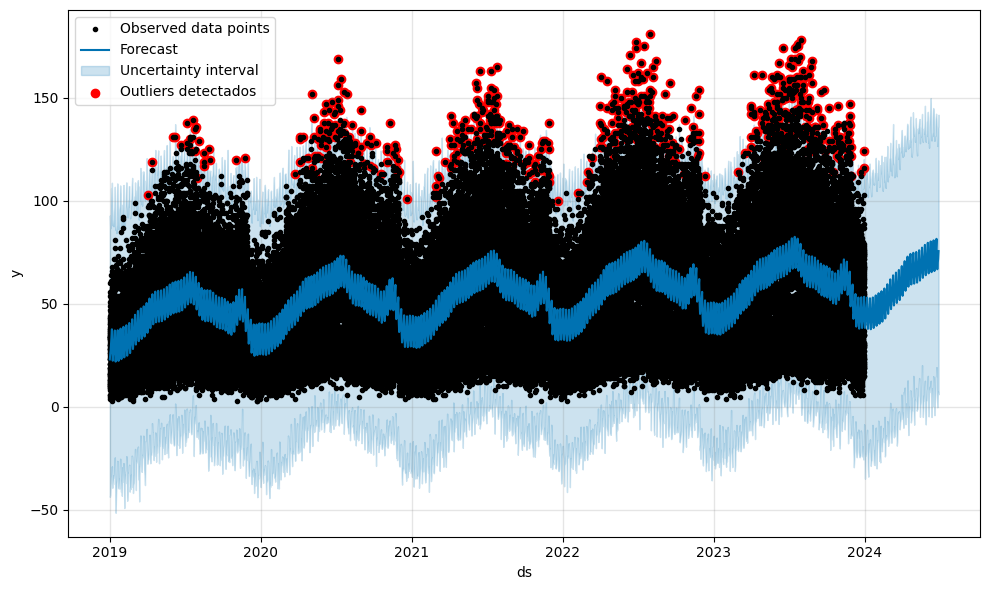

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparamos los datos para Prophet
df_prophet = df[['Fecha Pedido', 'Ventas']].rename(columns={'Fecha Pedido': 'ds', 'Ventas': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# 2. Inicializamos el modelo Prophet
model = Prophet(interval_width=0.99)  # Ajustar el intervalo de confianza al 95%

# 3. Ajustamos el modelo con los datos
model.fit(df_prophet)

# 4. Generamos fechas futuras para el pronóstico (180 días hacia adelante)
future = model.make_future_dataframe(periods=180, freq='D')

# 5. Realizamos el pronóstico
forecast = model.predict(future)

# 6. Alineamos las predicciones con los datos históricos
# Nos quedamos solo con las predicciones correspondientes a las fechas históricas
forecast_historical = forecast[forecast['ds'] <= df_prophet['ds'].max()]

# 7. Volvemos a unir las predicciones con los valores reales de ventas
df_merged = pd.merge(df_prophet, forecast_historical[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# 8. Identificamos outliers
df_merged['anomaly'] = (df_merged['y'] > df_merged['yhat_upper']) | (df_merged['y'] < df_merged['yhat_lower'])

# 9. Extraemos los outliers
outliers = df_merged[df_merged['anomaly'] == True]

# 10. Imprimimos los outliers detectados
print(outliers)

# 11. Visualizamos el pronóstico y los outliers
fig = model.plot(forecast)
plt.scatter(outliers['ds'], outliers['y'], color='red', label='Outliers detectados')
plt.legend()
plt.show()


In [ ]:
# Contamos el número de outliers en el DataFrame
num_outliers = df_merged['anomaly'].sum()

# Imprimimos el número total de outliers
print(f"Número total de outliers detectados: {num_outliers}")


Número total de outliers detectados: 572


In [ ]:
df_merged.loc[df_merged['anomaly'], 'y'] = df_merged.loc[df_merged['anomaly'], 'yhat']

## **2. ¿Cómo se relacionan las diferentes variables entre sí y con la variable objetivo (ventas)?**
**Propósito:** Evaluar las correlaciones y relaciones entre las variables que puedan influir en la predicción.
* **Preguntas relacionadas:**
1. ¿Existen correlaciones fuertes entre las variables categóricas, numéricas y la variable objetivo (ventas)?
2. ¿Qué conclusiones se pueden extraer de la prueba de hipótesis en las variables clave?
3. ¿Cómo impactan transformaciones básicas como Label Encoding y variables derivadas de la fecha en las ventas?
* **Acciones en el EDA:**
1. Aplicar transformaciones básicas como Label Encoding y la creación de nuevas features derivadas de la fecha.
2. Realizar una prueba de hipótesis para verificar si ciertas variables tienen un impacto significativo en las ventas.
3. Aplicar transformaciones en los datos como Lag/Shifted Features y Rolling Mean para enriquecer las características y observar su impacto en la correlación.

## **Correlacion Entre Variables**
La correlación es una medida estadística que describe la relación entre dos variables. En el análisis de datos, es útil identificar correlaciones fuertes entre variables porque pueden ayudar a explicar el comportamiento de la variable objetivo. Es importante distinguir entre correlación y causalidad: una correlación alta no implica necesariamente que una variable cause cambios en la otra.

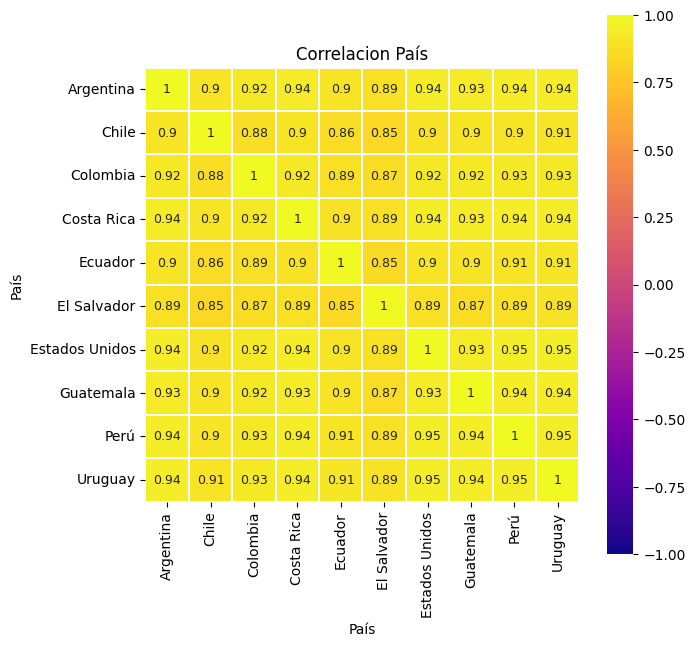

In [ ]:
pais_ventas = df.groupby(['Fecha Pedido', 'País']).Ventas.sum().reset_index().set_index('Fecha Pedido')
categoria_ventas = df.groupby(['Fecha Pedido', 'Categoría Tarjeta']).Ventas.sum().reset_index().set_index('Fecha Pedido')

corr =  pd.pivot_table(pais_ventas, values = 'Ventas', columns='País', index='Fecha Pedido').corr(method = "spearman")

plt.figure(figsize = (7,7))
plt.title('Correlacion País' )
sns.heatmap(corr,
            cmap='plasma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True);

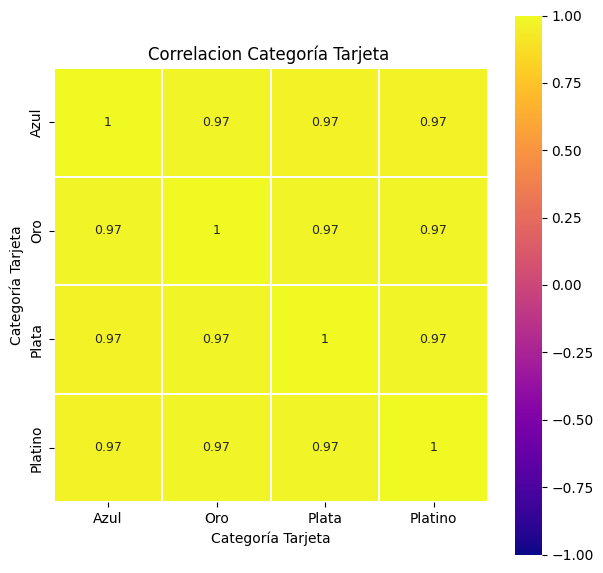

In [ ]:
corr =  pd.pivot_table(categoria_ventas, values = 'Ventas', columns='Categoría Tarjeta', index='Fecha Pedido').corr(method = "spearman")

plt.figure(figsize = (7,7))
plt.title('Correlacion Categoría Tarjeta ' )
sns.heatmap(corr,
            cmap='plasma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True);

# **Prueba de Hipótesis**
La prueba de hipótesis nos permite validar o refutar suposiciones sobre las diferencias entre grupos, como categorías de tarjetas o países, y su impacto en las ventas. Nos ayuda a identificar si las diferencias observadas en las ventas entre estos grupos son significativas o pueden atribuirse al azar.

* **Flujo del Proceso:**
1. **Comparación de Grupos:** Se comparan grupos (por ejemplo, categorías de tarjetas) para verificar si hay diferencias significativas en sus ventas.

2. **Test de Normalidad (Shapiro-Wilk):** Determina si los datos de los grupos siguen una distribución normal. Dependiendo de los resultados, se elige entre una prueba paramétrica o no paramétrica.

3. **Test de Homogeneidad (Levene):** Evalúa si las varianzas de los grupos son homogéneas. Si lo son, se usa una prueba t con varianzas iguales, de lo contrario, se aplica una prueba t con varianzas desiguales.

4. **Pruebas Paramétricas o No Paramétricas:**

* **Prueba t de Student:** Para datos normales con varianzas homogéneas.
* **Prueba de Mann-Whitney U:** Para datos no normales o con varianzas heterogéneas.
5. **Conclusión:** Si el p-valor es menor a 0.05, las diferencias observadas entre los grupos son estadísticamente significativas.

In [ ]:
import itertools
from scipy.stats import shapiro
from scipy.stats import stats
from scipy.stats import mannwhitneyu


def Comparar_dos_grupos(dataframe, grupo, objetivo):

  #1. Test de Normalidad = Shapiro Test
  #2 Test Homogeneidad = Levene Test
  #3. T Test Parametricos / No Parametricos

  item_comb = list(itertools.combinations(dataframe[grupo].unique(),2))

  AB = pd.DataFrame()

  for i in range(0, len(item_comb)):
    grupoA = dataframe[dataframe[grupo] == item_comb[i][0]][objetivo]
    grupoB = dataframe[dataframe[grupo] == item_comb[i][1]][objetivo]

    #Asumir que nuestros datos tienen distribucion Normal

    ntA = shapiro(grupoA)[1] <0.05
    ntB = shapiro(grupoB)[1] <0.05

    #H0: Distribucion es normal / False
    #H1: Distribucion no es normal / True

    if (ntA == False) & (ntB == False):## H0: Distribucion Normal
    #Prueba Parametrica
    #Asumir la homogeneidad de las variables

      leveneTest = stats.levene(grupoA, grupoB)[1]< 0.05

      #H0:Homogeneidad = False
      #H1: Homogeneidad = True

      if leveneTest == False:
        #Homogeneidad
        ttest = stats.ttest_ind(grupoA, grupoB, equal_var = True)[1]
      else:
        #Heterogenea
        ttest = stats.ttest_ind(grupoA, grupoB, equal_var = False)[1]
    else:
      #Test No Parametrica
      ttest = mannwhitneyu(grupoA, grupoB)[1]

    temp = pd.DataFrame({'Comparacion 2 Grupos':[ttest < 0.05],
                         'p-value':[ttest],
                         'Media_GrupoA':[grupoA.mean()],'Media_GrupoB':[grupoB.mean()],
                         'Mediana_GrupoA':[grupoA.median()], 'Mediana_GrupoB':[grupoB.median()],
                         'Cantidad_GrupoA':[grupoA.count()],'Cantidad_GrupoB':[grupoB.count()],
                         },index =[item_comb[i]])
    temp['Comparacion 2 Grupos'] = np.where(temp['Comparacion 2 Grupos'] == True, 'Grupos Diferentes',
                                            'Grupo Similares')
    temp['Tipo Prueba'] = np.where((ntA == False)& (ntB == False),'Parametrico', 'No Parametrico')

    AB = pd.concat([AB, temp[['Tipo Prueba','Comparacion 2 Grupos','p-value',
                              'Mediana_GrupoA','Mediana_GrupoB','Media_GrupoA','Media_GrupoB',
                              'Cantidad_GrupoA','Cantidad_GrupoB']]])
  return AB



#Comparar_dos_grupos(pais_ventas, grupo='País',objetivo='Ventas')

item_similares = Comparar_dos_grupos(categoria_ventas,grupo='Categoría Tarjeta',objetivo='Ventas')

#item_similares[item_similares['Comparacion 2 Grupos']=='Grupo Similares']
item_similares

,Tipo Prueba,Comparacion 2 Grupos,p-value,Mediana_GrupoA,Mediana_GrupoB,Media_GrupoA,Media_GrupoB,Cantidad_GrupoA,Cantidad_GrupoB
"(Azul, Oro)",No Parametrico,Grupos Diferentes,5.841133e-257,425.0,605.0,431.136986,611.052603,1825,1825
"(Azul, Plata)",No Parametrico,Grupos Diferentes,1.130584e-131,425.0,535.0,431.136986,542.761096,1825,1825
"(Azul, Platino)",No Parametrico,Grupos Diferentes,3.341555e-60,425.0,494.0,431.136986,500.722740,1825,1825
"(Oro, Plata)",No Parametrico,Grupos Diferentes,2.590684e-39,605.0,535.0,611.052603,542.761096,1825,1825
"(Oro, Platino)",No Parametrico,Grupos Diferentes,3.092130e-102,605.0,494.0,611.052603,500.722740,1825,1825
"(Plata, Platino)",No Parametrico,Grupos Diferentes,6.933354e-20,535.0,494.0,542.761096,500.722740,1825,1825


# **Feature Engineering**
El Feature Engineering es el proceso de transformar los datos crudos en características que mejor representen los patrones en los datos, lo cual es esencial para mejorar el rendimiento de los modelos predictivos. Algunas técnicas incluyen la creación de nuevas variables a partir de las existentes (como características temporales), la normalización o el escalado de datos.

In [ ]:
label_encoder_pais = LabelEncoder()
label_encoder_categoria = LabelEncoder()

# Aplicamos label encoding a las columnas 'País' y 'Categoría Tarjeta'
df['País'] = label_encoder_pais.fit_transform(df['País']) + 1
df['Categoría Tarjeta'] = label_encoder_categoria.fit_transform(df['Categoría Tarjeta']) + 1


In [ ]:
df.head()

,Fecha Pedido,Categoría Tarjeta,País,Ventas
0,2019-01-01,1,5,13
1,2019-01-02,1,5,11
2,2019-01-03,1,5,14
3,2019-01-04,1,5,13
4,2019-01-05,1,5,10


In [ ]:
url_test = "https://raw.githubusercontent.com/emadrigals104/PLFPython/main/Datasets/df_test.csv"

df_test = pd.read_csv(url_test,
                 sep=',',header=0,parse_dates=['Fecha Pedido'])

In [ ]:
df_test

,id,Fecha Pedido,Categoría Tarjeta,País
0,0,2024-01-01,1,1
1,1,2024-01-02,1,1
2,2,2024-01-03,1,1
3,3,2024-01-04,1,1
4,4,2024-01-05,1,1
...,...,...,...,...
3595,8455,2024-03-27,4,10
3596,8456,2024-03-28,4,10
3597,8457,2024-03-29,4,10
3598,8458,2024-03-30,4,10


In [ ]:
df = pd.concat([df, df_test], sort=False)

In [ ]:
def create_date_features(df):
    df['nro_mes'] = df['Fecha Pedido'].dt.month
    df['dia_mes'] = df['Fecha Pedido'].dt.day
    df['dia_anio'] = df['Fecha Pedido'].dt.dayofyear
    df['semana_anio'] = df['Fecha Pedido'].dt.isocalendar().week
    df['dia_semana'] = df['Fecha Pedido'].dt.dayofweek + 1
    df['anio'] = df['Fecha Pedido'].dt.year
    df["fin_semana"] = df['Fecha Pedido'].dt.weekday // 4
    df["trimestre"] = df['Fecha Pedido'].dt.quarter
    df['inicio_mes'] = df['Fecha Pedido'].dt.is_month_start.astype(int)
    df['fin_mes'] = df['Fecha Pedido'].dt.is_month_end.astype(int)
    df['inicio_trim'] = df['Fecha Pedido'].dt.is_quarter_start.astype(int)
    df['fin_trim'] = df['Fecha Pedido'].dt.is_quarter_end.astype(int)
    df['inicio_anio'] = df['Fecha Pedido'].dt.is_year_start.astype(int)
    df['fin_anio'] = df['Fecha Pedido'].dt.is_year_end.astype(int)
    # 1: Invierno - 2: Verano
    df["estacion"] = np.where(df.nro_mes.isin([12,1,2,3,4]), 2, 1)
    return df
df = create_date_features(df)

df.head()

,Fecha Pedido,Categoría Tarjeta,País,Ventas,id,nro_mes,dia_mes,dia_anio,semana_anio,dia_semana,anio,fin_semana,trimestre,inicio_mes,fin_mes,inicio_trim,fin_trim,inicio_anio,fin_anio,estacion
0,2019-01-01,1,5,13.0,NaN,1,1,1,1,2,2019,0,1,1,0,1,0,1,0,2
1,2019-01-02,1,5,11.0,NaN,1,2,2,1,3,2019,0,1,0,0,0,0,0,0,2
2,2019-01-03,1,5,14.0,NaN,1,3,3,1,4,2019,0,1,0,0,0,0,0,0,2
3,2019-01-04,1,5,13.0,NaN,1,4,4,1,5,2019,1,1,0,0,0,0,0,0,2
4,2019-01-05,1,5,10.0,NaN,1,5,5,1,6,2019,1,1,0,0,0,0,0,0,2


## **3. ¿Cómo podemos enriquecer los datos para mejorar las predicciones?**
**Propósito:** Aplicar transformaciones avanzadas de features para mejorar el rendimiento del modelo.
* **Preguntas relacionadas:**
1. ¿Qué impacto tiene la adición de Random Noise para mejorar la generalización del modelo?
2. ¿Cómo pueden las Lag/Shifted Features y la Media Móvil capturar la dinámica temporal de las ventas?
3. ¿Qué mejoras aportan las Exponentially Weighted Mean Features y el One-Hot Encoding en el modelo?
* **Acciones en el EDA:**
1. Aplicar Random Noise para reducir la varianza y evitar overfitting.
2. Crear Lag/Shifted Features para capturar las tendencias a lo largo del tiempo y calcular la Media Móvil para suavizar fluctuaciones.
3. Implementar Exponentially Weighted Mean Features para enfatizar valores recientes y aplicar One-Hot Encoding para mejorar la representación de las variables categóricas.

## **Random Noise**
El random noise se refiere a la variabilidad aleatoria que no puede ser explicada por el modelo. En algunas ocasiones, se puede añadir ruido aleatorio a los datos para evitar que los modelos se ajusten demasiado a los patrones existentes (overfitting), promoviendo la generalización a datos nuevos.

In [ ]:
def random_noise(dataframe):

    return np.random.normal(size=(len(dataframe),))

## **Lag/Shifted Features**
Las lag features (características rezagadas) son variables que se desplazan en el tiempo, es decir, representan valores pasados de la misma serie temporal. Son útiles en la predicción de series temporales porque permiten que el modelo tenga en cuenta patrones pasados para predecir valores futuros.


In [ ]:
df.sort_values(by=['País', 'Categoría Tarjeta', 'Fecha Pedido'], axis=0, inplace=True)

def lag_features(dataframe, lags):
    for lag in lags:
        dataframe['Ventas_lag_' + str(lag)] = dataframe.groupby(["País", "Categoría Tarjeta"])['Ventas'].transform(
            lambda x: x.shift(lag)) + random_noise(dataframe)
    return dataframe

df = lag_features(df, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

## **Rolling Mean / Moving Average**
El promedio móvil es una técnica que suaviza la serie temporal al promediar los datos a lo largo de una ventana de tiempo definida. Es útil para identificar la tendencia a largo plazo y reducir el impacto de fluctuaciones a corto plazo.

In [ ]:
def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['Ventas_roll_mean_' + str(window)] = dataframe.groupby(["País", "Categoría Tarjeta"])['Ventas']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
            dataframe)
    return dataframe


df = roll_mean_features(df, [365, 546, 730])

## **Exponentially Weighted Mean Features**
Las características de media ponderada exponencialmente otorgan más peso a los datos recientes en una serie temporal, permitiendo que el modelo responda más rápidamente a los cambios recientes en el comportamiento de los datos.

In [ ]:
def ewm_features(dataframe, alphas, lags):
    dataframe = dataframe.copy()
    for alpha in alphas:
        for lag in lags:
            dataframe['Ventas_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["País", "Categoría Tarjeta"])['Ventas']. \
                    transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

alphas = [0.99, 0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

df = ewm_features(df, alphas, lags)
df.tail()

,Fecha Pedido,Categoría Tarjeta,País,Ventas,id,nro_mes,dia_mes,dia_anio,semana_anio,dia_semana,anio,fin_semana,trimestre,inicio_mes,fin_mes,inicio_trim,fin_trim,inicio_anio,fin_anio,estacion,Ventas_lag_91,Ventas_lag_98,Ventas_lag_105,Ventas_lag_112,Ventas_lag_119,Ventas_lag_126,Ventas_lag_182,Ventas_lag_364,Ventas_lag_546,Ventas_lag_728,Ventas_roll_mean_365,Ventas_roll_mean_546,Ventas_roll_mean_730,Ventas_ewm_alpha_099_lag_91,Ventas_ewm_alpha_099_lag_98,Ventas_ewm_alpha_099_lag_105,Ventas_ewm_alpha_099_lag_112,Ventas_ewm_alpha_099_lag_180,Ventas_ewm_alpha_099_lag_270,Ventas_ewm_alpha_099_lag_365,Ventas_ewm_alpha_099_lag_546,Ventas_ewm_alpha_099_lag_728,Ventas_ewm_alpha_095_lag_91,Ventas_ewm_alpha_095_lag_98,Ventas_ewm_alpha_095_lag_105,Ventas_ewm_alpha_095_lag_112,Ventas_ewm_alpha_095_lag_180,Ventas_ewm_alpha_095_lag_270,Ventas_ewm_alpha_095_lag_365,Ventas_ewm_alpha_095_lag_546,Ventas_ewm_alpha_095_lag_728,Ventas_ewm_alpha_09_lag_91,Ventas_ewm_alpha_09_lag_98,Ventas_ewm_alpha_09_lag_105,Ventas_ewm_alpha_09_lag_112,Ventas_ewm_alpha_09_lag_180,Ventas_ewm_alpha_09_lag_270,Ventas_ewm_alpha_09_lag_365,Ventas_ewm_alpha_09_lag_546,Ventas_ewm_alpha_09_lag_728,Ventas_ewm_alpha_08_lag_91,Ventas_ewm_alpha_08_lag_98,Ventas_ewm_alpha_08_lag_105,Ventas_ewm_alpha_08_lag_112,Ventas_ewm_alpha_08_lag_180,Ventas_ewm_alpha_08_lag_270,Ventas_ewm_alpha_08_lag_365,Ventas_ewm_alpha_08_lag_546,Ventas_ewm_alpha_08_lag_728,Ventas_ewm_alpha_07_lag_91,Ventas_ewm_alpha_07_lag_98,Ventas_ewm_alpha_07_lag_105,Ventas_ewm_alpha_07_lag_112,Ventas_ewm_alpha_07_lag_180,Ventas_ewm_alpha_07_lag_270,Ventas_ewm_alpha_07_lag_365,Ventas_ewm_alpha_07_lag_546,Ventas_ewm_alpha_07_lag_728,Ventas_ewm_alpha_05_lag_91,Ventas_ewm_alpha_05_lag_98,Ventas_ewm_alpha_05_lag_105,Ventas_ewm_alpha_05_lag_112,Ventas_ewm_alpha_05_lag_180,Ventas_ewm_alpha_05_lag_270,Ventas_ewm_alpha_05_lag_365,Ventas_ewm_alpha_05_lag_546,Ventas_ewm_alpha_05_lag_728
3595,2024-03-27,4,10,NaN,8455.0,3,27,87,13,3,2024,0,1,0,0,0,0,0,0,2,64.339611,61.787176,70.702534,61.186172,92.972413,103.571616,86.592810,86.171597,91.658517,66.081866,98.783948,95.281759,90.291546,63.971708,61.883203,69.871895,61.835671,100.899287,128.630713,63.191395,92.762404,65.813817,63.893481,61.480269,69.396953,61.288901,100.481124,127.168988,63.984217,91.860530,65.147028,63.877602,61.121323,68.886187,60.841524,99.920970,125.380924,65.032528,90.844446,64.495401,64.134206,60.877621,68.137276,60.660223,98.678693,121.955060,67.282445,89.198100,63.828337,64.778213,61.229710,67.753399,61.328288,97.330593,118.758606,69.645257,88.092686,64.026404,66.948369,63.391236,68.078233,65.013792,94.908649,113.322498,74.181521,87.581672,66.731365
3596,2024-03-28,4,10,NaN,8456.0,3,28,88,13,4,2024,0,1,0,0,0,0,0,0,2,72.896146,56.653568,72.866294,81.038035,111.568769,93.631837,90.125085,67.333842,83.958568,72.726872,99.274707,93.447916,93.055491,71.919717,56.058832,73.958719,80.808357,114.858993,109.196307,85.771914,85.077624,73.918138,71.594674,56.274013,73.769848,80.014445,114.274056,109.908449,84.899211,85.343026,73.557351,71.187760,56.512132,73.488619,78.984152,113.492097,110.638092,83.903253,85.584445,73.049540,70.426841,56.975524,72.827455,76.932045,111.735739,111.591012,82.256489,85.839620,71.965667,69.833464,57.568913,72.126020,75.098486,109.699178,111.927582,81.093577,85.927806,71.007921,69.474185,59.695618,71.039116,73.006896,104.954324,111.161249,80.090760,86.290836,70.365683
3597,2024-03-29,4,10,NaN,8457.0,3,29,89,13,5,2024,1,1,0,0,0,0,0,0,2,58.851038,66.907980,72.241410,71.616458,96.630608,86.013130,101.585157,83.029006,89.494896,65.157276,97.986502,93.957494,89.910095,59.129197,64.910588,70.039587,72.088084,104.108590,154.541963,68.177719,88.960776,66.079181,59.629734,64.563701,70.188492,72.400722,104.513703,152.745422,68.844961,88.817151,66.377868,60.218776,64.151213,70.348862,72.698415,104.949210,150.563809,69.590325,88.658444,66.704954,61.285368,63.395105,70.565491,72.986409,105.547148,146.318202,70.851298,88.367924,67.193133,62.250039,62.77

## **One-Hot Encoding**
El One-Hot Encoding es una técnica de transformación de datos categóricos en variables numéricas. Cada categoría se convierte en una nueva columna binaria (0 o 1), lo que permite a los algoritmos de machine learning trabajar con variables categóricas.

In [ ]:
df = pd.get_dummies(df, columns=['dia_semana', 'nro_mes'])

df['Ventas'] = np.log1p(df["Ventas"].values)
df['Ventas'].head()

,Ventas
7300,3.526361
7301,3.784190
7302,3.178054
7303,2.944439
7304,3.555348


In [ ]:
df.shape

(76600, 104)

**Reemplazar espacios en blanco por guiones**

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

## **Train - Test - Split**
Dividir el conjunto de datos en conjuntos de entrenamiento y prueba es esencial para evaluar la capacidad del modelo para generalizar a datos no vistos. El modelo se entrena con los datos de entrenamiento y se evalúa con los datos de prueba para medir su precisión y evitar el overfitting.

In [ ]:
# Los datos se deben ordenar para separar las series temporales
df = df.sort_values("Fecha_Pedido").reset_index(drop = True)

# Train Validation Split
# Validacion Incluye 3 Meses (Oct. Nov. Dec. 2013)
train = df.loc[(df["Fecha_Pedido"] < "2023-10-01"), :]
val = df.loc[(df["Fecha_Pedido"] >= "2023-10-01") & (df["Fecha_Pedido"] < "2024-01-01"), :]


cols = [col for col in train.columns if col not in ['Fecha_Pedido','ID', 'Ventas', 'anio']]

Y_train = train['Ventas']
X_train = train[cols]

Y_val = val['Ventas']
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((69320,), (69320, 101), (3680,), (3680, 101))

## **4. ¿Qué tan efectivo es el modelo actual y cómo podemos optimizarlo?**
**Propósito:** Evaluar el rendimiento del modelo y ajustarlo mediante técnicas de optimización.
* **Preguntas relacionadas:**
1. ¿Qué tan precisas son las predicciones basadas en la función de costo SMAPE?
2. ¿Cómo podemos ajustar el modelo utilizando hiperparámetros para obtener mejores resultados?
3. ¿Qué variables tienen más influencia según el Feature Importance?
* **Acciones en el EDA:**
1. Utilizar SMAPE como métrica de evaluación para medir el rendimiento del modelo.
2. Aplicar técnicas de optimización de hiperparámetros para mejorar el modelo LightGBMRegressor.
3. Analizar el Feature Importance para identificar las variables más relevantes y optimizar el modelo.

## **Funcion de Costo SMAPE**
La SMAPE (Symmetric Mean Absolute Percentage Error) es una métrica utilizada para evaluar el rendimiento de modelos de predicción, especialmente en series temporales. La SMAPE calcula el error absoluto entre las predicciones y los valores reales, normalizado por la suma de los valores absolutos de los datos reales y predichos, lo que la hace más robusta frente a valores extremos.

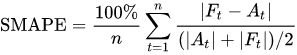

In [ ]:
# SMAPE: Error porcentual absoluto medio simétrico (MAPE ajustado)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def lgbm_smape(y_true, y_pred):
    smape_val = smape(y_true, y_pred)
    return 'SMAPE', smape_val, False

## **Modelo LGMRegressor**
LGBMRegressor es un modelo basado en LightGBM (Light Gradient Boosting Machine), una implementación rápida y eficiente del algoritmo de boosting de árboles. Es particularmente útil para grandes conjuntos de datos y ha demostrado un rendimiento superior en muchas tareas de predicción.

El objetivo es encontrar un modelo 𝐹(𝑥) que minimice la pérdida entre las predicciones y los valores reales. Esto se logra mediante la adición de predictores de forma iterativa.

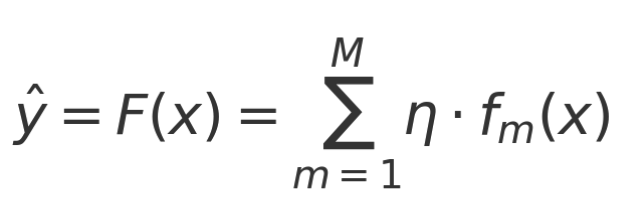


* y^:es la predicción final del modelo.
* 𝑀: es el número total de árboles.
* 𝜂: es la tasa de aprendizaje (learning rate).
* 𝑓𝑚(𝑥) es el 𝑚-ésimo árbol de decisión.
* 𝑥: es el conjunto de características de entrada.

In [ ]:
modelo_1 = lgb.LGBMRegressor(random_state=384,force_col_wise=True).fit(X_train, Y_train,
                                                      eval_metric= lambda y_true, y_pred: [lgbm_smape(y_true, y_pred)])

print("TRAIN SMAPE:", smape(Y_train, modelo_1.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, modelo_1.predict(X_val)))

[LightGBM] [Info] Total Bins 17502
[LightGBM] [Info] Number of data points in the train set: 69320, number of used features: 100
[LightGBM] [Info] Start training from score 3.809680
TRAIN SMAPE: 3.597660818142785
VALID SMAPE: 3.5827200287414085


## **Feature Importance**
La importancia de características es una métrica que indica qué variables son más relevantes para el modelo predictivo. En LightGBM, se puede observar qué variables aportan más al proceso de toma de decisiones del modelo, lo que ayuda a interpretar los resultados.

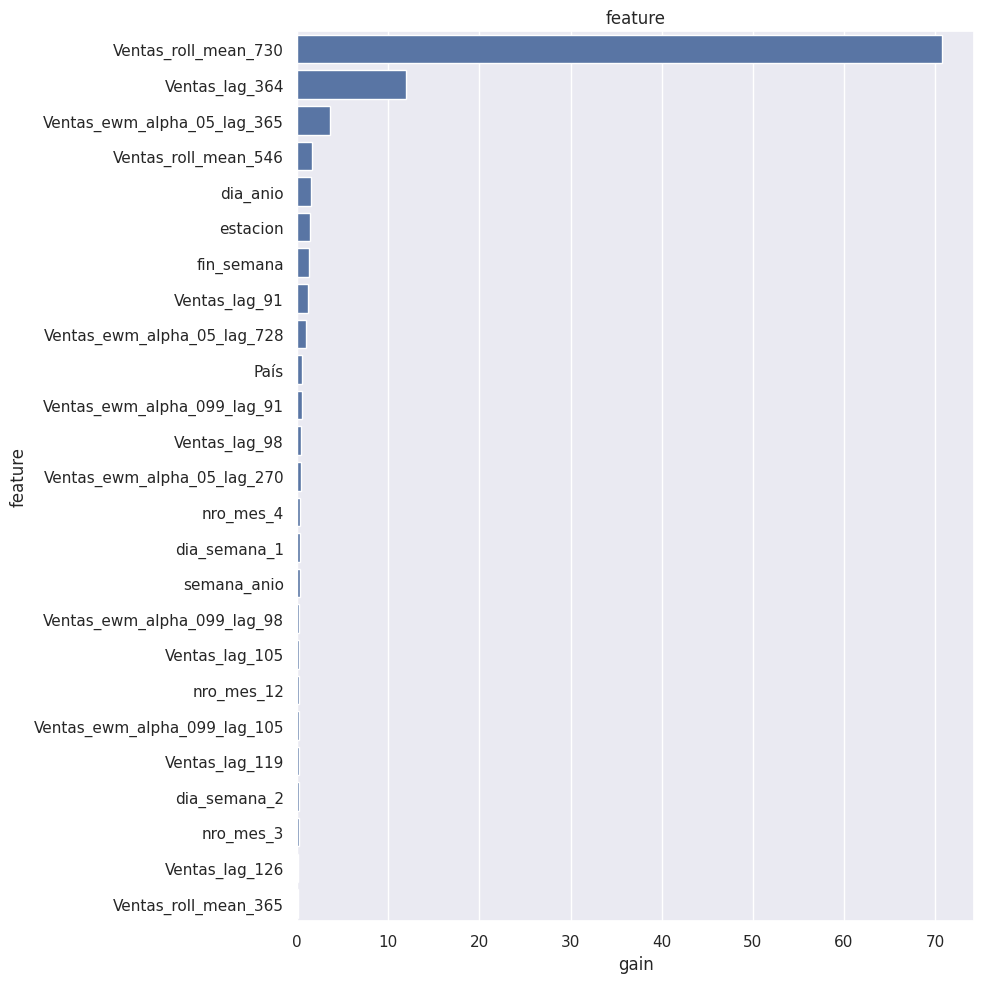

                          feature  split       gain
27           Ventas_roll_mean_730    137  70.754322
22                 Ventas_lag_364    263  11.905903
79    Ventas_ewm_alpha_05_lag_365    104   3.646809
26           Ventas_roll_mean_546     92   1.672742
4                        dia_anio    257   1.524538
14                       estacion     47   1.382641
6                      fin_semana     71   1.236558
15                  Ventas_lag_91     49   1.143154
81    Ventas_ewm_alpha_05_lag_728    115   0.988462
1                            País     99   0.487863
28    Ventas_ewm_alpha_099_lag_91     31   0.480745
16                  Ventas_lag_98     38   0.420537
78    Ventas_ewm_alpha_05_lag_270     47   0.400275
92                      nro_mes_4     24   0.354164
82                   dia_semana_1    118   0.294630
5                     semana_anio     49   0.273750
29    Ventas_ewm_alpha_099_lag_98     27   0.239749
17                 Ventas_lag_105     38   0.209157
100         

In [ ]:
def plot_lgb_importances(model,plot=True,num=10):
    from matplotlib import pyplot as plt
    import seaborn as sns
    gain = model.booster_.feature_importance(importance_type='gain')
    feat_imp = pd.DataFrame({'feature': model.booster_.feature_name(),
                             'split': model.booster_.feature_importance(importance_type='split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
    print(feat_imp.head(num))

feature_imp_df = plot_lgb_importances(modelo_1, num=50)

## **Analisis del Error**
El análisis del error se enfoca en identificar y comprender las predicciones erróneas del modelo. Esto implica revisar las diferencias entre los valores predichos y los reales, buscando patrones que puedan indicar problemas en los datos o en el modelo.

In [ ]:
error = pd.DataFrame({
    "Fecha Pedido":val.Fecha_Pedido,
    "País":X_val.País,
    "Categoría Tarjeta":X_val.Categoría_Tarjeta,
    "actual":Y_val,
    "pred":modelo_1.predict(X_val)
}).reset_index(drop = True)

error["error"] = np.abs(error.actual-error.pred)

error.sort_values("error", ascending=False).head(10)

,Fecha Pedido,País,Categoría Tarjeta,actual,pred,error
3289,2023-12-22,5,1,1.945910,2.896632,0.950722
624,2023-10-16,5,4,2.302585,3.185150,0.882565
1175,2023-10-30,2,1,2.079442,2.890240,0.810798
2755,2023-12-08,6,1,1.945910,2.732320,0.786410
2591,2023-12-04,5,2,2.397895,3.180563,0.782668
1226,2023-10-31,6,3,2.302585,3.054218,0.751633
3300,2023-12-22,6,1,1.945910,2.658860,0.712950
3510,2023-12-27,6,1,1.945910,2.621056,0.675146
79,2023-10-02,6,4,2.197225,2.868438,0.671213
2595,2023-12-04,5,1,2.079442,2.740653,0.661212


In [ ]:
error[["actual", "pred", "error"]].describe([0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,50%,70%,80%,90%,95%,99%,max
actual,3680.0,3.868139,0.571015,1.945910,3.988984,4.262680,4.382027,4.532599,4.644391,4.828314,4.997212
pred,3680.0,3.879210,0.557521,2.451230,4.006440,4.253371,4.386377,4.543677,4.650978,4.796390,4.944189
error,3680.0,0.129751,0.109721,0.000017,0.105474,0.161435,0.204688,0.275418,0.343316,0.478819,0.950722


## **HiperParametros - Optimizacion del Modelo**
La optimización de hiperparámetros es el proceso de ajustar los parámetros del modelo (como la tasa de aprendizaje o el número de árboles en un algoritmo de boosting) para maximizar su rendimiento. Este proceso se realiza a menudo mediante técnicas de búsqueda en cuadrícula (grid search) o búsqueda aleatoria (random search).

In [ ]:
lgbm_params = {
"num_leaves":[20,31], # Default 31
"max_depth":[-1, 20, 30], # Default -1
"learning_rate":[0.1, 0.05], # Default 0.1
"n_estimators":[10000,15000], # Default 100
"min_split_gain":[0.0, 2,5], # Default 0
"min_child_samples":[10, 20, 30], # Default 20
"colsample_bytree":[0.5, 0.8, 1.0], # Default 1
"reg_alpha":[0.0, 0.5, 1], # Default 0
"reg_lambda":[0.0, 0.5, 1] # Default 0
}

In [ ]:
from lightgbm import early_stopping

# Ajustar el modelo con parada temprana usando callbacks
modelo_2 = lgb.LGBMRegressor(num_leaves=31, n_estimators=2000, max_depth=20, random_state=384, metric="custom")

modelo_2.fit(
    X_train[cols], Y_train,
    eval_set=[(X_val[cols], Y_val)],  # Conjunto de validación
    eval_metric=lambda y_true, y_pred: [lgbm_smape(y_true, y_pred)],
    callbacks=[early_stopping(stopping_rounds=100)]  # Callback para la parada temprana
)
print("Mejor Iteracion:", modelo_2.booster_.best_iteration)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17502
[LightGBM] [Info] Number of data points in the train set: 69320, number of used features: 100
[LightGBM] [Info] Start training from score 3.809680
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[194]	valid_0's SMAPE: 3.56503
Mejor Iteracion: 194


In [ ]:
df.sort_values(["País", "Categoría_Tarjeta", "Fecha_Pedido"], inplace = True)

train_final = df.loc[(df["Fecha_Pedido"] < "2024-01-01"), :]
test_final = df.loc[(df["Fecha_Pedido"] >= "2024-01-01"), :]

X_train_final = train_final[cols]
Y_train_final = train_final.Ventas
X_test_final = test_final[cols]

final_model = lgb.LGBMRegressor(num_leaves=31, n_estimators=15000, max_depth=20, random_state=384, metric = "custom")
final_model.set_params(n_estimators=modelo_2.booster_.best_iteration)
final_model.fit(X_train_final[cols], Y_train_final,
                eval_metric= lambda y_true, y_pred: [lgbm_smape(y_true, y_pred)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17502
[LightGBM] [Info] Number of data points in the train set: 73000, number of used features: 100
[LightGBM] [Info] Start training from score 3.812627


LGBMRegressor(max_depth=20, metric='custom', n_estimators=194, random_state=384)

### **Invertir transformación**

In [ ]:
train_final['Categoría_Tarjeta'] = train_final['Categoría_Tarjeta'] - 1
train_final['Categoría_Tarjeta'] = label_encoder_categoria.inverse_transform(train_final['Categoría_Tarjeta'])

test_final['Categoría_Tarjeta'] = test_final['Categoría_Tarjeta'] - 1
test_final['Categoría_Tarjeta'] = label_encoder_categoria.inverse_transform(test_final['Categoría_Tarjeta'])

In [ ]:
train_final['País'] = train_final['País'] - 1
train_final['País'] = label_encoder_pais.inverse_transform(train_final['País'])

test_final['País'] = test_final['País'] - 1
test_final['País'] = label_encoder_pais.inverse_transform(test_final['País'])

## **5. ¿Cómo se comportan las predicciones y cómo podemos visualizarlas?**
**Propósito:** Generar y analizar las predicciones del modelo, visualizando los resultados de manera comprensible.
* **Preguntas relacionadas:**
1. ¿Cómo se comportan las predicciones en comparación con los datos reales?
2. ¿Qué podemos inferir al comparar las predicciones con la tendencia y la estacionalidad observadas?
3. ¿Cómo podemos visualizar las predicciones de manera clara para extraer conclusiones útiles?
* **Acciones en el EDA:**
1. Generar las predicciones utilizando el modelo final.
2. Guardar las predicciones y crear visualizaciones que comparen las predicciones con los datos reales, mostrando también las tendencias.
3. Usar gráficos para visualizar la tendencia, estacionalidad, y las predicciones de manera que faciliten su interpretación.

### **Generar las predicciones utilizando el modelo final**

In [ ]:
# Generar las predicciones utilizando el modelo final
predicciones = final_model.predict(X_test_final)

# Crear un DataFrame para las predicciones y el train
train_final['Tipo'] = 'Train'
test_final['Pred'] = predicciones

# Configurar 'Fecha_Pedido' como índice
train_final.set_index('Fecha_Pedido', inplace=True)
test_final.set_index('Fecha_Pedido', inplace=True)

# Resamplear solo las columnas numéricas (por semana)
train_resampled = train_final[['Ventas']].resample('W').mean().reset_index()
test_resampled = test_final[['Pred']].resample('W').mean().reset_index()
test_resampled_real = test_final[['Ventas']].resample('W').mean().reset_index()

In [ ]:
train_final.reset_index(inplace=True)
test_final.reset_index(inplace=True)

In [ ]:
test_final.head()

,Fecha_Pedido,Categoría_Tarjeta,País,Ventas,id,dia_mes,dia_anio,semana_anio,anio,fin_semana,trimestre,inicio_mes,fin_mes,inicio_trim,fin_trim,inicio_anio,fin_anio,estacion,Ventas_lag_91,Ventas_lag_98,Ventas_lag_105,Ventas_lag_112,Ventas_lag_119,Ventas_lag_126,Ventas_lag_182,Ventas_lag_364,Ventas_lag_546,Ventas_lag_728,Ventas_roll_mean_365,Ventas_roll_mean_546,Ventas_roll_mean_730,Ventas_ewm_alpha_099_lag_91,Ventas_ewm_alpha_099_lag_98,Ventas_ewm_alpha_099_lag_105,Ventas_ewm_alpha_099_lag_112,Ventas_ewm_alpha_099_lag_180,Ventas_ewm_alpha_099_lag_270,Ventas_ewm_alpha_099_lag_365,Ventas_ewm_alpha_099_lag_546,Ventas_ewm_alpha_099_lag_728,Ventas_ewm_alpha_095_lag_91,Ventas_ewm_alpha_095_lag_98,Ventas_ewm_alpha_095_lag_105,Ventas_ewm_alpha_095_lag_112,Ventas_ewm_alpha_095_lag_180,Ventas_ewm_alpha_095_lag_270,Ventas_ewm_alpha_095_lag_365,Ventas_ewm_alpha_095_lag_546,Ventas_ewm_alpha_095_lag_728,Ventas_ewm_alpha_09_lag_91,Ventas_ewm_alpha_09_lag_98,Ventas_ewm_alpha_09_lag_105,Ventas_ewm_alpha_09_lag_112,Ventas_ewm_alpha_09_lag_180,Ventas_ewm_alpha_09_lag_270,Ventas_ewm_alpha_09_lag_365,Ventas_ewm_alpha_09_lag_546,Ventas_ewm_alpha_09_lag_728,Ventas_ewm_alpha_08_lag_91,Ventas_ewm_alpha_08_lag_98,Ventas_ewm_alpha_08_lag_105,Ventas_ewm_alpha_08_lag_112,Ventas_ewm_alpha_08_lag_180,Ventas_ewm_alpha_08_lag_270,Ventas_ewm_alpha_08_lag_365,Ventas_ewm_alpha_08_lag_546,Ventas_ewm_alpha_08_lag_728,Ventas_ewm_alpha_07_lag_91,Ventas_ewm_alpha_07_lag_98,Ventas_ewm_alpha_07_lag_105,Ventas_ewm_alpha_07_lag_112,Ventas_ewm_alpha_07_lag_180,Ventas_ewm_alpha_07_lag_270,Ventas_ewm_alpha_07_lag_365,Ventas_ewm_alpha_07_lag_546,Ventas_ewm_alpha_07_lag_728,Ventas_ewm_alpha_05_lag_91,Ventas_ewm_alpha_05_lag_98,Ventas_ewm_alpha_05_lag_105,Ventas_ewm_alpha_05_lag_112,Ventas_ewm_alpha_05_lag_180,Ventas_ewm_alpha_05_lag_270,Ventas_ewm_alpha_05_lag_365,Ventas_ewm_alpha_05_lag_546,Ventas_ewm_alpha_05_lag_728,dia_semana_1,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,dia_semana_6,dia_semana_7,nro_mes_1,nro_mes_2,nro_mes_3,nro_mes_4,nro_mes_5,nro_mes_6,nro_mes_7,nro_mes_8,nro_mes_9,nro_mes_10,nro_mes_11,nro_mes_12,Pred
0,2024-01-01,Azul,Argentina,NaN,0.0,1,1,1,2024,0,1,1,0,1,0,1,0,2,54.498626,47.087911,47.696062,45.122954,51.815809,54.350709,52.516560,24.438438,63.842044,45.925962,64.818601,59.474937,60.347687,56.041887,49.241185,47.111685,44.200694,66.988646,62.137690,40.069019,63.270490,46.958904,56.245807,50.228099,47.590689,45.016715,66.920656,62.641392,40.327263,64.361161,46.772990,56.575923,51.504553,48.255960,46.063485,66.804472,63.162245,40.617220,65.738535,46.493884,57.439208,54.152112,49.773059,48.224688,66.582492,63.834780,41.123598,68.495360,45.791422,58.476764,56.830919,51.479154,50.434215,66.544256,64.028454,41.569146,71.148732,44.922016,60.568061,61.71184,55.115538,54.788915,67.484067,63.123381,42.282952,75.3984,42.906598,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,3.619876
1,2024-01-02,Azul,Argentina,NaN,1.0,2,2,1,2024,0,1,0,0,0,0,0,0,2,55.757164,59.862873,63.659772,57.563614,53.164296,41.636472,66.393397,33.140937,74.971773,21.336850,64.245467,59.041882,58.459141,55.010419,60.882412,65.811117,57.862007,66.999886,62.001377,26.140690,73.892705,22.249589,55.062290,60.461405,65.079534,57.350836,66.996033,62.032070,26.716363,73.518058,23.238650,55.157592,60.050455,64.225596,56.806349,66.980447,62.116224,27.461722,73.173853,24.449388,55.487842,59.630422,62.754612,56.044938,66.916498,62.366956,29.024720,72.899072,26.758284,56.043029,59.749276,61.643746,55.730264,66.863277,62.608536,30.670744,73.144619,28.876605,57.784031,61.35592,60.557769,56.394458,67.242034,62.561690,34.141476,74.6992,32.453299,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,3.599880
2,2024-01-03,Azul,Argentina,NaN,2.0,3,3,1,2024,0,1,0,0,0,0,0,0,2,53.898150,57.251749,61.445761,56.971857,68.334954,76.670058,67.683844,39.793819,75.321139,32.323551,65.772868

In [ ]:

# Crear la figura con Plotly
fig = make_subplots()

# Línea de Train
fig.add_trace(go.Scatter(
    x=train_resampled['Fecha_Pedido'],
    y=train_resampled['Ventas'],
    mode='lines',
    name='Train',
    line=dict(color='green', width=2, dash='solid')
))

# Línea de Predicciones
fig.add_trace(go.Scatter(
    x=test_resampled['Fecha_Pedido'],
    y=test_resampled['Pred'],
    mode='lines',
    name='Pred',
    line=dict(color='blue', width=2, dash='solid')
))

# Añadir título y etiquetas a los ejes
fig.update_layout(
    title='Train vs Predicciones',
    xaxis_title='Fecha Pedido',
    yaxis_title='Ventas',
    template='plotly_white',
    width=900,
    height=500
)

# Mostrar la figura
fig.show()


## **Guardar la Prediccion**

In [ ]:
test_preds = final_model.predict(X_test_final)

submission = pd.DataFrame({
    "id":test_final.id.astype(int),
    "Ventas":np.expm1(test_preds)
})

submission.to_csv("submission.csv", index = None)

submission.head()

,id,Ventas
0,0,36.332924
1,1,35.593857
2,2,39.246877
3,3,42.758534
4,4,45.279735


In [ ]:
forecast = pd.DataFrame({
    "Fecha Pedido":test_final["Fecha_Pedido"],
    "País":test_final["País"],
    "Categoría Tarjeta":test_final["Categoría_Tarjeta"],
    "Ventas":np.expm1(test_preds)
})

forecast.head()

,Fecha Pedido,País,Categoría Tarjeta,Ventas
0,2024-01-01,Argentina,Azul,36.332924
1,2024-01-02,Argentina,Azul,35.593857
2,2024-01-03,Argentina,Azul,39.246877
3,2024-01-04,Argentina,Azul,42.758534
4,2024-01-05,Argentina,Azul,45.279735


# **Visualización de Predicciones**

In [ ]:
# Convertir las columnas a cadenas y crear la columna combinada 'Pais-Tarjeta'
forecast['País'] = forecast['País'].astype(str)
forecast['Categoría Tarjeta'] = forecast['Categoría Tarjeta'].astype(str)
forecast['Pais-Tarjeta'] = forecast['País'] + '_' + forecast['Categoría Tarjeta']

# Pivotear los datos y hacer resample para obtener la media semanal
ventas = forecast.pivot_table(index='Fecha Pedido', columns='Pais-Tarjeta', values='Ventas', aggfunc='mean').resample('D').mean()
forecast.drop(columns=['Pais-Tarjeta'], inplace=True)

# Resetear el índice para que 'Fecha Pedido' sea una columna
ventas = ventas.reset_index()

# Obtener listas únicas de países y categorías de tarjetas
paises = forecast['País'].unique().tolist()
categorias_tarjeta = forecast['Categoría Tarjeta'].unique().tolist()

In [ ]:
# Selecciones iniciales
pais = paises[0]
categoria = categorias_tarjeta[0]

i = pais + '_' + categoria

# Preparar la fuente de datos
fuente_ventas = pd.DataFrame({
    'Fecha Pedido': ventas['Fecha Pedido'],
    'y': ventas[i].values if i in ventas.columns else [0]*len(ventas)
})
source = ColumnDataSource(data=fuente_ventas)

# Preparar la fuente de datos de referencia
datos_ref = ventas.copy()
ref = ColumnDataSource(data=datos_ref)

# Crear la figura
p = figure(width=750, height=300, title=i, x_axis_type='datetime', tools="pan,wheel_zoom,reset")
linea = p.line(x='Fecha Pedido', y='y', source=source, color='blue', legend_label='Ventas')

# Añadir tooltips
tooltips = [
    ('Fecha Pedido', '@{Fecha Pedido}{%F}'),
    ('Ventas', '@y'),
]

hover = HoverTool(
    tooltips=tooltips,
    formatters={'@{Fecha Pedido}': 'datetime'},
    mode='vline',
    renderers=[linea]
)
p.add_tools(hover)

# Crear widgets de selección
select_pais = Select(title="País", value=pais, options=paises)
select_categoria = Select(title="Categoría Tarjeta", value=categoria, options=categorias_tarjeta)

# Definir la callback
callback = CustomJS(
    args=dict(source=source, ref=ref, country_select=select_pais, category_select=select_categoria, p=p),
    code="""
    var pais = country_select.value;
    var categoria = category_select.value;
    var nombre_columna = pais + '_' + categoria;

    var datos = ref.data;
    var y_nueva = datos[nombre_columna];
    if (y_nueva === undefined) {
        y_nueva = Array(source.data['y'].length).fill(0);
    }

    source.data['y'] = y_nueva;
    p.title.text = nombre_columna;
    source.change.emit();
"""
)

# Conectar las callbacks a los widgets
select_pais.js_on_change('value', callback)
select_categoria.js_on_change('value', callback)

# Organizar el layout
layout = column(
    Div(text='<h4>Reporte de Ventas (Bokeh)</h4>'),
    row(select_pais, select_categoria),
    p
)

show(layout)